# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 571


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + f'q={city}&appid={weather_api_key}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ribeira grande
Processing Record 2 of Set 1 | katabu
Processing Record 3 of Set 1 | ta`u
Processing Record 4 of Set 1 | savanna-la-mar
Processing Record 5 of Set 1 | carauari
Processing Record 6 of Set 1 | anadyr
Processing Record 7 of Set 1 | guatrache
Processing Record 8 of Set 1 | isangel
Processing Record 9 of Set 1 | muynoq
Processing Record 10 of Set 1 | kerikeri
Processing Record 11 of Set 1 | tura
Processing Record 12 of Set 1 | ocho rios
Processing Record 13 of Set 1 | tazovsky
Processing Record 14 of Set 1 | chengde
Processing Record 15 of Set 1 | blackmans bay
Processing Record 16 of Set 1 | bredasdorp
Processing Record 17 of Set 1 | rio grande
Processing Record 18 of Set 1 | vingt cinq
City not found. Skipping...
Processing Record 19 of Set 1 | wailua homesteads
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | adrar
Processing Record 22 of Set 1 | bodo
Processing

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          547
Lat           547
Lng           547
Max Temp      547
Humidity      547
Cloudiness    547
Wind Speed    547
Country       547
Date          547
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ribeira grande,38.5167,-28.7000,289.14,94,8,0.45,PT,1712892814
1,katabu,-4.9333,122.5167,302.21,77,33,1.79,ID,1712893020
2,ta`u,-14.2336,-169.5144,302.38,76,40,4.97,AS,1712893021
3,savanna-la-mar,18.2190,-78.1332,300.12,88,83,1.42,JM,1712893021
4,carauari,-4.8828,-66.8958,296.74,99,94,0.86,BR,1712893022


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("/Users/diego/Downloads/Starter_Code-7/output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("/Users/diego/Downloads/Starter_Code-7/output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ribeira grande,38.5167,-28.7000,289.14,94,8,0.45,PT,1712892814
1,katabu,-4.9333,122.5167,302.21,77,33,1.79,ID,1712893020
2,ta`u,-14.2336,-169.5144,302.38,76,40,4.97,AS,1712893021
3,savanna-la-mar,18.2190,-78.1332,300.12,88,83,1.42,JM,1712893021
4,carauari,-4.8828,-66.8958,296.74,99,94,0.86,BR,1712893022


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

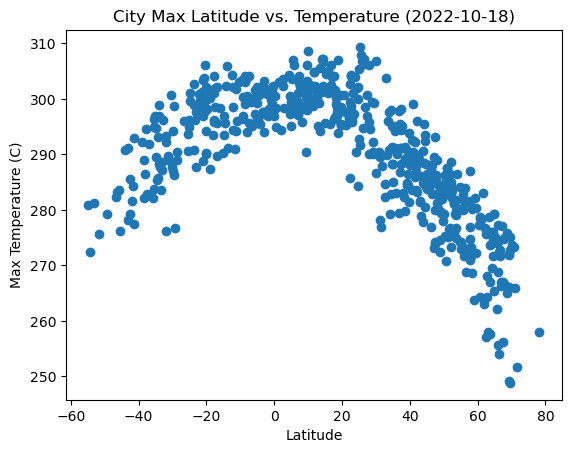

In [8]:
# Build scatter plot for latitude vs. temperature
fig, ax = plt.subplots()
ax.set_title('City Max Latitude vs. Temperature (2022-10-18)')
ax.set_ylabel('Max Temperature (C)')
ax.set_xlabel('Latitude')
ax.scatter(city_data_df['Lat'], city_data_df['Max Temp'])

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("/Users/diego/Downloads/Starter_Code-7/output_data")

# Show plot
plt.show()

#### Latitude Vs. Humidity

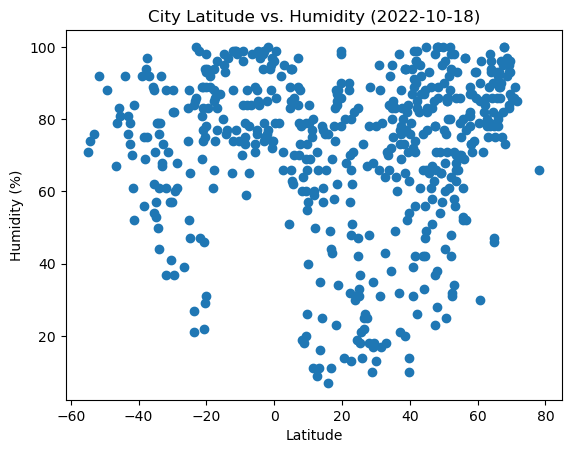

In [9]:
# Build the scatter plots for latitude vs. humidity
fig, ax = plt.subplots()
ax.set_title('City Latitude vs. Humidity (2022-10-18)')
ax.set_ylabel('Humidity (%)')
ax.set_xlabel('Latitude')
ax.scatter(city_data_df['Lat'], city_data_df['Humidity'])

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("/Users/diego/Downloads/Starter_Code-7/output_data")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

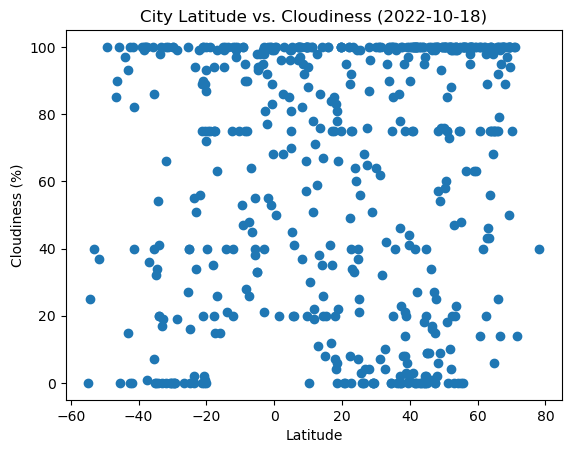

In [10]:
# Build the scatter plots for latitude vs. cloudiness
fig, ax = plt.subplots()
ax.set_title('City Latitude vs. Cloudiness (2022-10-18)')
ax.set_ylabel('Cloudiness (%)')
ax.set_xlabel('Latitude')
ax.scatter(city_data_df['Lat'], city_data_df['Cloudiness'])

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("/Users/diego/Downloads/Starter_Code-7/output_data")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

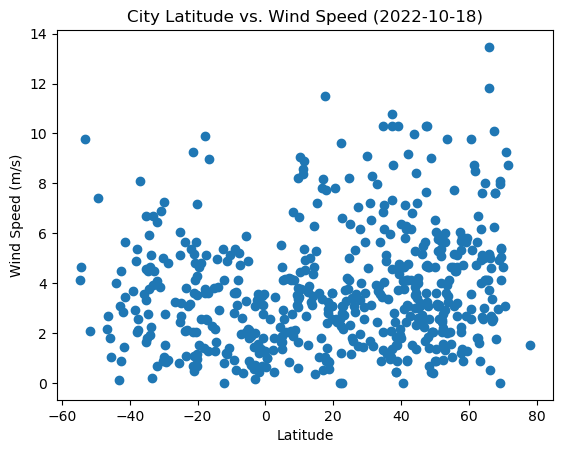

In [11]:
# Build the scatter plots for latitude vs. wind speed
fig, ax = plt.subplots()
ax.set_title('City Latitude vs. Wind Speed (2022-10-18)')
ax.set_ylabel('Wind Speed (m/s)')
ax.set_xlabel('Latitude')
ax.scatter(city_data_df['Lat'], city_data_df['Wind Speed'])

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("/Users/diego/Downloads/Starter_Code-7/output_data")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linear_regression(x, y):
    r = st.pearsonr(x, y)
    (slope, intercept, r, p, se) = linregress(x, y)
    rvalues = x * slope + intercept
    fig, ax = plt.subplots()
    ax.plot(x, rvalues, 'r-', color= 'red')
    ax.scatter(x, y)

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ribeira grande,38.5167,-28.7000,289.14,94,8,0.45,PT,1712892814
3,savanna-la-mar,18.2190,-78.1332,300.12,88,83,1.42,JM,1712893021
5,anadyr,64.7500,177.4833,265.43,78,6,8.00,RU,1712892920
8,muynoq,43.7683,59.0214,284.90,66,100,9.97,UZ,1712892798
10,tura,25.5198,90.2201,307.86,21,3,1.82,IN,1712893025


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,katabu,-4.9333,122.5167,302.21,77,33,1.79,ID,1712893020
2,ta`u,-14.2336,-169.5144,302.38,76,40,4.97,AS,1712893021
4,carauari,-4.8828,-66.8958,296.74,99,94,0.86,BR,1712893022
6,guatrache,-37.6678,-63.5302,282.67,75,100,2.56,AR,1712893023
7,isangel,-19.5500,169.2667,301.21,83,75,4.63,VU,1712892854


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8694785975693514


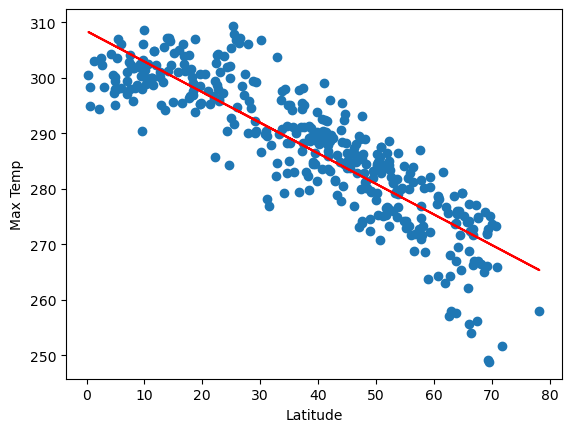

In [15]:
# Linear regression on Northern Hemisphere
north_lat = northern_hemi_df['Lat']
north_temp = northern_hemi_df['Max Temp']
slope, intercept, r, p, se = linregress(north_lat, north_temp)


fig, ax = plt.subplots()
ax.set_ylabel('Max Temp')
ax.set_xlabel('Latitude')
ax.plot(north_lat, slope * north_lat + intercept, color= 'red')
ax.scatter(north_lat, north_temp)
print(f'The r-value is: {r}')

The r-value is: 0.7310847699926248


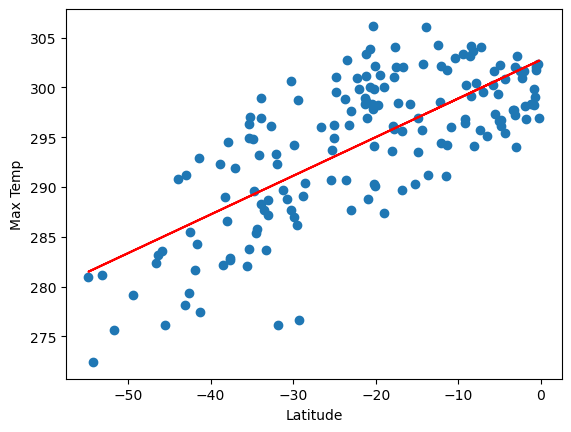

In [16]:
# Linear regression on Southern Hemisphere
south_lat = southern_hemi_df['Lat']
south_temp = southern_hemi_df['Max Temp']
slope, intercept, r, p, se = linregress(south_lat, south_temp)


fig, ax = plt.subplots()
ax.set_ylabel('Max Temp')
ax.set_xlabel('Latitude')
ax.plot(south_lat, slope * south_lat + intercept, color= 'red')
ax.scatter(south_lat, south_temp)
print(f'The r-value is: {r}')


**Discussion about the linear relationship:** 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.2839882263278007


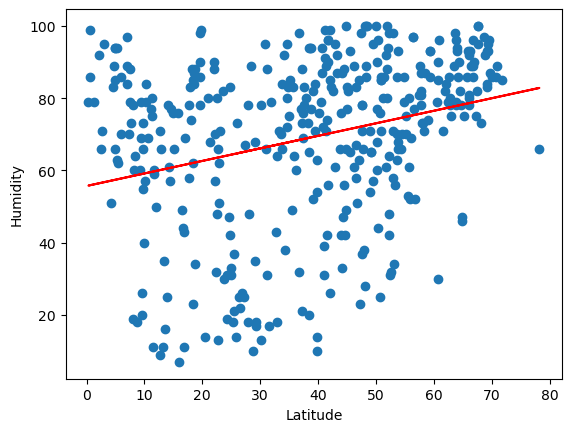

In [17]:
# Northern Hemisphere
north_lat = northern_hemi_df['Lat']
north_hum = northern_hemi_df['Humidity']
slope, intercept, r, p, se = linregress(north_lat, north_hum)


fig, ax = plt.subplots()
ax.set_ylabel('Humidity')
ax.set_xlabel('Latitude')
ax.plot(north_lat, slope * north_lat + intercept, color= 'red')
ax.scatter(north_lat, north_hum)
print(f'The r-value is: {r}')

The r-value is: 0.2686551155771039


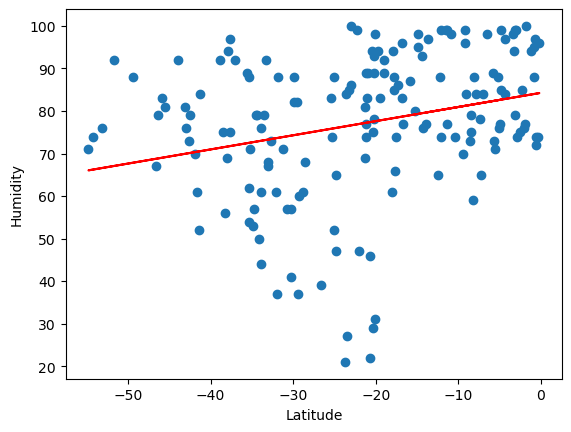

In [18]:
# Southern Hemisphere
south_lat = southern_hemi_df['Lat']
south_hum = southern_hemi_df['Humidity']
slope, intercept, r, p, se = linregress(south_lat, south_hum)


fig, ax = plt.subplots()
ax.set_ylabel('Humidity')
ax.set_xlabel('Latitude')
ax.plot(south_lat, slope * south_lat + intercept, color= 'red')
ax.scatter(south_lat, south_hum)
print(f'The r-value is: {r}')

**Discussion about the linear relationship:** 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.11247541699600973


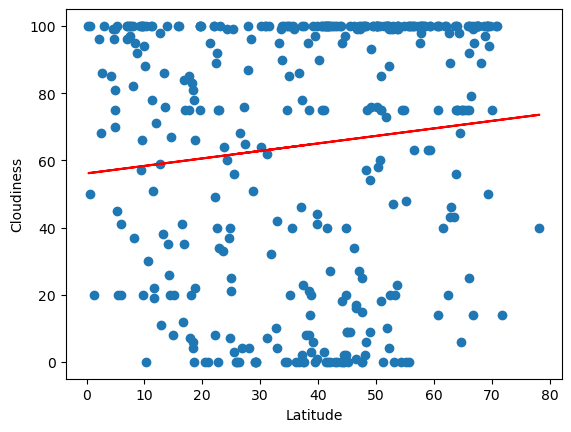

In [19]:
# Northern Hemisphere
north_lat = northern_hemi_df['Lat']
north_cloud = northern_hemi_df['Cloudiness']
slope, intercept, r, p, se = linregress(north_lat, north_cloud)


fig, ax = plt.subplots()
ax.set_ylabel('Cloudiness')
ax.set_xlabel('Latitude')
ax.plot(north_lat, slope * north_lat + intercept, color= 'red')
ax.scatter(north_lat, north_cloud)
print(f'The r-value is: {r}')

The r-value is: 0.7310847699926248


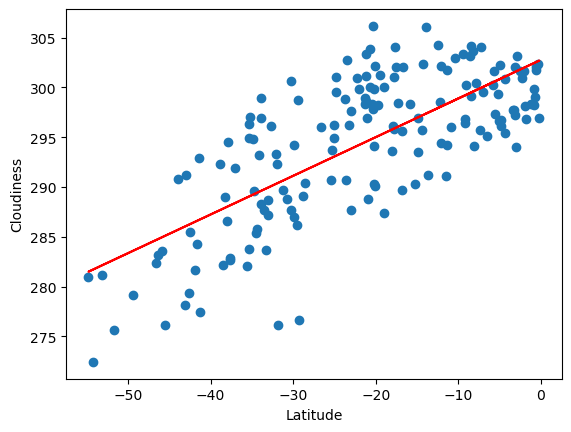

In [20]:
# Southern Hemisphere
south_lat = southern_hemi_df['Lat']
south_cloud = southern_hemi_df['Max Temp']
slope, intercept, r, p, se = linregress(south_lat, south_cloud)


fig, ax = plt.subplots()
ax.set_ylabel('Cloudiness')
ax.set_xlabel('Latitude')
ax.plot(south_lat, slope * south_lat + intercept, color= 'red')
ax.scatter(south_lat, south_cloud)
print(f'The r-value is: {r}')

**Discussion about the linear relationship:** 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.15168625888658557


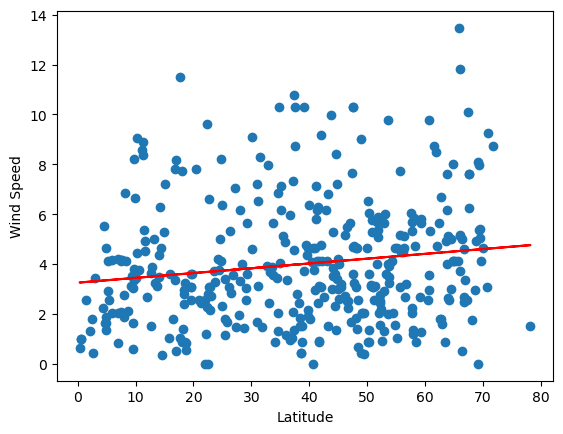

In [21]:
# Northern Hemisphere
north_lat = northern_hemi_df['Lat']
north_wind = northern_hemi_df['Wind Speed']
slope, intercept, r, p, se = linregress(north_lat, north_wind)

fig, ax = plt.subplots()
ax.set_ylabel('Wind Speed')
ax.set_xlabel('Latitude')
ax.plot(north_lat, slope * north_lat + intercept, color= 'red')
ax.scatter(north_lat, north_wind)
print(f"The r-value is: {r}")

The r-value is: -0.23134296210393687


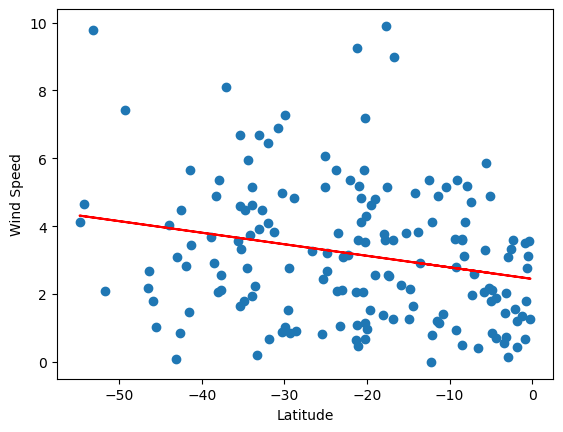

In [22]:
# Southern Hemisphere
south_lat = southern_hemi_df['Lat']
south_wind = southern_hemi_df['Wind Speed']
slope, intercept, r, p, se = linregress(south_lat, south_wind)

fig, ax = plt.subplots()
ax.set_ylabel('Wind Speed')
ax.set_xlabel('Latitude')
ax.plot(south_lat, slope * south_lat + intercept, color= 'red')
ax.scatter(south_lat, south_wind)
print(f"The r-value is: {r}")

**Discussion about the linear relationship:** 